### Discusion acerca del error de la clase anterior.

# Planos
Dada una direccion ($n$) (normal al plano y un vector $x_0$ por donde pasa el plano, para un vector generico $x$, el plano esta dado por


$$n \cdot(x - x_0)= 0 .$$

In [ ]:
# planos en SymPy
import sympy as sp
from sympy import symbols, expand, Matrix

# la normal, punto generico y punto por donde pasa
n1, n2, n3 = symbols("n1, n2, n3")
x, y, z = symbols("x, y, z")
x01, x02, x03 = symbols("x01, x02, x03")

# normal
N = Matrix( [n1, n2, n3])
X = Matrix( [x, y, z])
X0 = Matrix( [x01, x02, x03])

Plane = N.dot(X - X0)
Plane


n1*(x - x01) + n2*(-x02 + y) + n3*(-x03 + z)

Vamos a asumir que $n=(3,-1,2)$, $x0=(3,2,0)$.

In [ ]:
n = Matrix( [3,-1,2])
x0 = Matrix( [3,2, 0])

# sustituimos
PlaneSubs = Plane.subs ( {n1:n[0], n2:n[1], n3:n[2], x01:x0[0], x02:x0[1], x03:x0[2]})
PlaneSubs

3*x - y + 2*z - 7

In [ ]:
# para dibujarlo se pueden usar herramientas de SymPy
# como forma implicita, pero por ahora lo voy
# dibujar con matplotlib.
# despejamos la z, para volverlo explicito
from sympy import solve
explicitPlane = solve(PlaneSubs, z)
explicitPlane

[-3*x/2 + y/2 + 7/2]

In [ ]:
# lambdify para porderlo dibujar
from sympy import lambdify
zPlane = lambdify( [x,y], explicitPlane[0], "numpy")
# probemos que se "lambdifico"
zPlane(1,2)

3.0

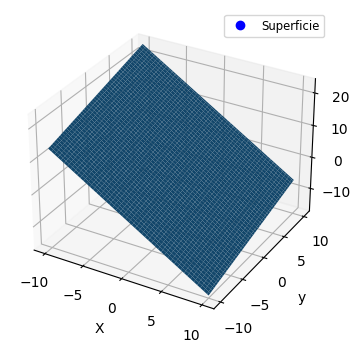

In [ ]:
# graficamos el plano
import numpy as np
import matplotlib.pyplot as plt

# para controlar el tamanho
plt.rcParams["figure.figsize"]=[7.0, 3.5]
plt.rcParams["figure.autolayout"]=True

# el dominio
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)


x, y = np.meshgrid(x,y)
z = zPlane(x,y)

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

# etiquetas
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_zlabel('Z')

# dibujar el plano
myPlane = ax.plot_surface( x, y, z, label="Un plano")

# la siguiente linea es dummy para la leyenda.
dummy = plt.Line2D( [0],[0], linestyle="none", c='b', marker='o')
ax.legend( [dummy], ["Superficie"], loc='upper right', fontsize='small')

plt.show()



### Actividad #1
Dados dos planos generados por los vectores

$$n_1=(1,2,1) \quad , \quad x_0=(1,2,3) .$$
y
$$ n_2=(-1,-1,3) \quad , \quad x_0=(-1,1,0) .$$

Se intersectan en una recta.  Encuentre la interseccion usando `SymPy`.

Dibuje los dos planos y la recta que los intersecta. Verifique que la recta es generada por un punto el plano y el vector normal $n = n_1 \times n_2$. `SymPy` tiene la funcion `Plane` que produce un plano. Verifique que los planos encontrados con el metodo explicado aca, coinciden con el de `sympy.plane`

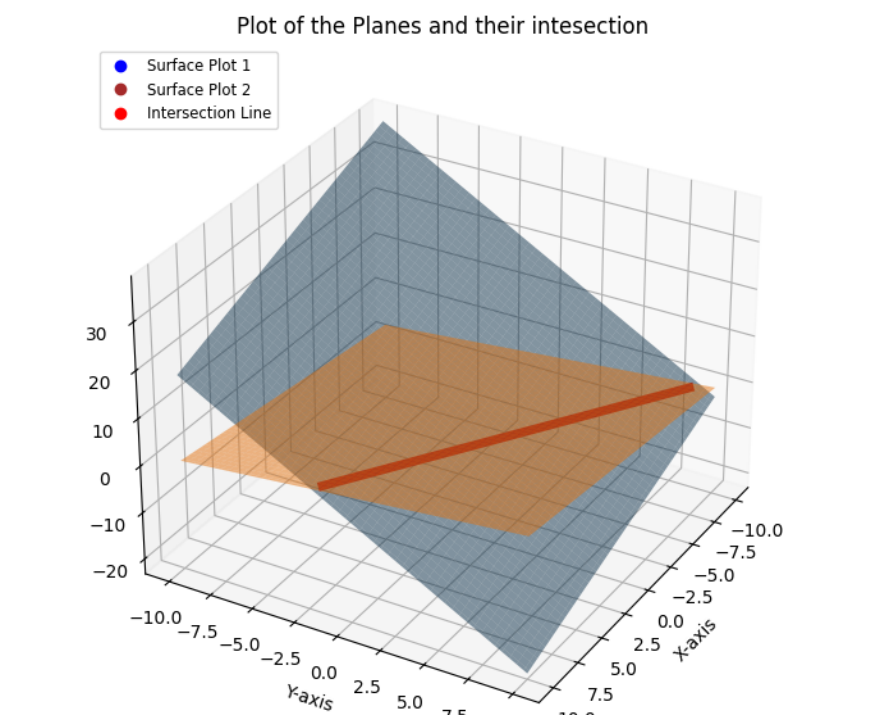

# Calculo multidimensional Parte 2.
Lo que hemos visto hasta el momento en la seccion de calculo multidimensional es geometria analitica (planos, rectas,etc).
Veamos el calculo propiamente dicho.

## Calculo Vectorial
La funciones vectoriales son de, por ejemplo,
la ecuacion de una helice (helix) en el espacio esta dada por

$$\begin{pmatrix} a \cos t \\ b \sin t \\ c t\end{pmatrix} .$$

donde $a,b,c$ son constantes reales. Si $a=b$ la helice es circular.


In [ ]:
import sympy as sp
from sympy import Matrix, symbols, diff

t = symbols('t')
a,b,c = symbols('a,b,c', constant=True)
r = Matrix( [ a*sp.cos(t), b*sp.sin(t), c*t])
r

Matrix([
[a*cos(t)],
[b*sin(t)],
[     c*t]])

In [ ]:
# grafiquemosla
myHelix = r.subs( {a:2, b:3, c:5})
myHelix

Matrix([
[2*cos(t)],
[3*sin(t)],
[     5*t]])

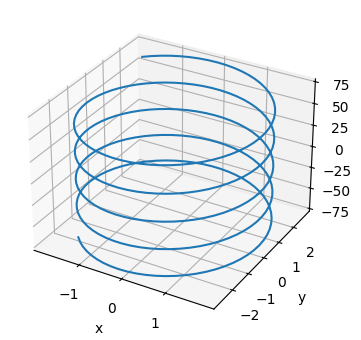

In [ ]:
# lo podemos hacer con sympy
from sympy.plotting import plot3d_parametric_line
plot3d_parametric_line( myHelix[0], myHelix[1], myHelix[2], (t,-15,15))

In [ ]:
# derivada de funciones vectoriales
diff(r, t)

Matrix([
[-a*sin(t)],
[ b*cos(t)],
[        c]])

### Ejercicio (para mi)
Encuentre el angulo entre el vector velocidad y el vector aceleracion como funcion del tiempo.

Solucion analiticas:
El vector velocidad des $v=\dot{r}= \frac{dr}{dt}$.
El vector aceleracion des $a=\ddot{r}= \frac{d^2r}{dt^2}$.
donde $r=(r_x(t), r_y(t), r_z(t))$, es el vector desplazamiento.

El coseno del angulo entre ambos vectores esta dado por

$$\cos \theta = \frac{v \cdot a}{ \| v \|  \| a \|} .$$
Grafique para valores de $a,b,c$ dados. Pruebe que para $a=b$
el angulo es 90 grados $\pi/2$.




In [ ]:
import sympy as sp
v = diff(r, t)
acc = diff(v, t) # tambien a=diff(v,t,2), o a=diff(a,t,t)

cost = v.dot(acc)/sp.sqrt( v.dot(v) * acc.dot(acc)) # tambien puedo usar (v.norm()*acc.norm())
cost

(a**2*sin(t)*cos(t) - b**2*sin(t)*cos(t))/sqrt((a**2*cos(t)**2 + b**2*sin(t)**2)*(a**2*sin(t)**2 + b**2*cos(t)**2 + c**2))

In [ ]:
theta = sp.acos(cost)
theta

acos((a**2*sin(t)*cos(t) - b**2*sin(t)*cos(t))/sqrt((a**2*cos(t)**2 + b**2*sin(t)**2)*(a**2*sin(t)**2 + b**2*cos(t)**2 + c**2)))

In [ ]:
theta.subs(a,b)

pi/2

In [ ]:
# grafiquemos para a=2,b=1,c=1
thetat = theta.subs({a:2, b:1, c:1})
thetat

acos(3*sin(t)*cos(t)/sqrt((sin(t)**2 + 4*cos(t)**2)*(4*sin(t)**2 + cos(t)**2 + 1)))

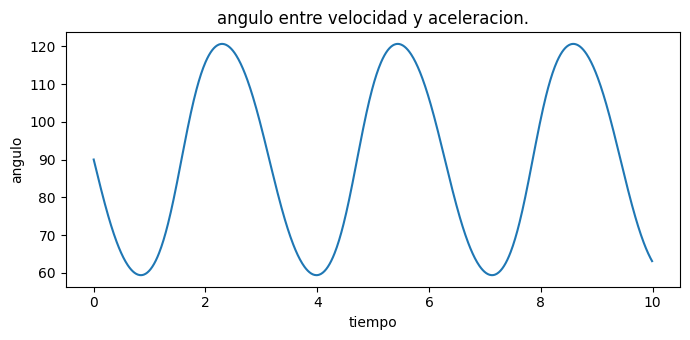

In [ ]:
# grafiquemos, con matplotlib
from sympy import lambdify
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

domain = np.arange(0,10,0.01) # tambien puede usar linspace

# lambdify thetat
thetaL = lambdify (t, thetat)(domain)

plt.title("angulo entre velocidad y aceleracion.")
plt.xlabel("tiempo")
plt.ylabel("angulo")

plt.plot(domain, thetaL*180/pi) # en grados
plt.show()

### Actividad #2
Dadas una curva en 2D $(x(t), y(t))$, la curvatura esta definida como

$$\kappa = \frac{\dot{x} \ddot{y} - \dot{y} \ddot{x}}{(\dot{x}^2 + \dot{y}^2)^{3/2}} .$$

Muestre (usando `SymPy` )que la curvatura de una particula viajando en trayectoria circular de radio $R$ es $1/R$.

## Vector tangente


$$T(t) = \frac{\dot{r}(t)}{\| \dot{r}(t) \|} .$$

Es un vector unitario en la direccion del desplazamiento de la particula.

In [ ]:
from sympy import Function
t = symbols('t', real=True, positive=True)
x = Function('x', real=True)(t)
y = Function('y', real=True)(t)
z = Function('z', real=True)(t)

r = Matrix( [x, y, z])
r

Matrix([
[x(t)],
[y(t)],
[z(t)]])

In [ ]:
velocity = diff(r,t)
display(velocity)
T = velocity/velocity.norm() # tambien puede ser velocity/sqrt( velocity.dot(velocity))
T

Matrix([
[Derivative(x(t), t)],
[Derivative(y(t), t)],
[Derivative(z(t), t)]])

Matrix([
[Derivative(x(t), t)/sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)],
[Derivative(y(t), t)/sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)],
[Derivative(z(t), t)/sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)]])

### Actividad 3
Escriba el vector anterior de forma simplicada. Es decir saque factor comun del los corchetes.

## Vector normal
La derivada del vector tangente, normalizada.


$$N = \frac{\dot{T}}{\| \dot{T} \|} .$$

In [ ]:
D = diff(T, t)
D/D.norm()

Matrix([
[((-(re(Derivative(x(t), t))*re(Derivative(x(t), (t, 2))) + im(Derivative(x(t), t))*im(Derivative(x(t), (t, 2))))*Abs(Derivative(x(t), t))*sign(Derivative(x(t), t))/Derivative(x(t), t) - (re(Derivative(y(t), t))*re(Derivative(y(t), (t, 2))) + im(Derivative(y(t), t))*im(Derivative(y(t), (t, 2))))*Abs(Derivative(y(t), t))*sign(Derivative(y(t), t))/Derivative(y(t), t) - (re(Derivative(z(t), t))*re(Derivative(z(t), (t, 2))) + im(Derivative(z(t), t))*im(Derivative(z(t), (t, 2))))*Abs(Derivative(z(t), t))*sign(Derivative(z(t), t))/Derivative(z(t), t))*Derivative(x(t), t)/(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)**(3/2) + Derivative(x(t), (t, 2))/sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2))/sqrt(Abs(((re(Derivative(x(t), t))*re(Derivative(x(t), (t, 2))) + im(Derivative(x(t), t))*im(Derivative(x(t), (t, 2))))*Abs(Derivative(x(t), t))*sign(Derivative(x(t), t))/Derivative(x(t), t) + (re(Der

Que hacemos con expresiones como estas?
* usar `simplify`
* usar  `radsimp`
* hacer sustituciones

In [ ]:
sp.simplify(D/D.norm())

Matrix([
[(-(re(Derivative(x(t), t))*re(Derivative(x(t), (t, 2))) + im(Derivative(x(t), t))*im(Derivative(x(t), (t, 2))))*Derivative(x(t), t) - (re(Derivative(y(t), t))*re(Derivative(y(t), (t, 2))) + im(Derivative(y(t), t))*im(Derivative(y(t), (t, 2))))*Derivative(x(t), t) - (re(Derivative(z(t), t))*re(Derivative(z(t), (t, 2))) + im(Derivative(z(t), t))*im(Derivative(z(t), (t, 2))))*Derivative(x(t), t) + (Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*Derivative(x(t), (t, 2)))/sqrt(Abs((re(Derivative(x(t), t))*re(Derivative(x(t), (t, 2))) + im(Derivative(x(t), t))*im(Derivative(x(t), (t, 2))))*Derivative(x(t), t) + (re(Derivative(y(t), t))*re(Derivative(y(t), (t, 2))) + im(Derivative(y(t), t))*im(Derivative(y(t), (t, 2))))*Derivative(x(t), t) + (re(Derivative(z(t), t))*re(Derivative(z(t), (t, 2))) + im(Derivative(z(t), t))*im(Derivative(z(t), (t, 2))))*Derivative(x(t), t) - (Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Deriva

In [ ]:
# usemos radsimp
from sympy import MatMul
Dt = diff(T, t)
N2 =1/sp.sqrt(Dt.dot(Dt))
N = MatMul(N2, Dt)
N

1/sqrt(((-(re(Derivative(x(t), t))*re(Derivative(x(t), (t, 2))) + im(Derivative(x(t), t))*im(Derivative(x(t), (t, 2))))*Abs(Derivative(x(t), t))*sign(Derivative(x(t), t))/Derivative(x(t), t) - (re(Derivative(y(t), t))*re(Derivative(y(t), (t, 2))) + im(Derivative(y(t), t))*im(Derivative(y(t), (t, 2))))*Abs(Derivative(y(t), t))*sign(Derivative(y(t), t))/Derivative(y(t), t) - (re(Derivative(z(t), t))*re(Derivative(z(t), (t, 2))) + im(Derivative(z(t), t))*im(Derivative(z(t), (t, 2))))*Abs(Derivative(z(t), t))*sign(Derivative(z(t), t))/Derivative(z(t), t))*Derivative(x(t), t)/(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)**(3/2) + Derivative(x(t), (t, 2))/sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2))**2 + ((-(re(Derivative(x(t), t))*re(Derivative(x(t), (t, 2))) + im(Derivative(x(t), t))*im(Derivative(x(t), (t, 2))))*Abs(Derivative(x(t), t))*sign(Derivative(x(t), t))/Derivative(x(t), t) - (re(Derivati

## Vector binormal
Este es perpendicular a los otros dos y unitario

$$B = \frac{T \times N}{ \| T \times N \|} .$$

Dados los antecedentes, no vay ni siquiera, a tratar de calcularlo de forma explicita como funcion de $x(r), y(t), z(t)$.

Lo unico que tiene sentido es hacerlo para casos espeficicos y esto da lugar a la actividad # 4.

### Actividad # 4.
Voluntaria pero tiene 3 decimas de bono en la nota final.

* Encuntre los tres vectores $T,N,B$, de una helice con parametros $a,b,c$ generales.  Simplifique al maximo.
* Asuma $a=b$ y simplifique.
* Asuma $a=1, b=2, c=1$, evalue las expresiones anteriores de forma numerica y grafique la helice y los tres vectores $T,N,B$.
Asuma tambien que $t=2$.

### Proxima clase comenzamos en longitud de arco.

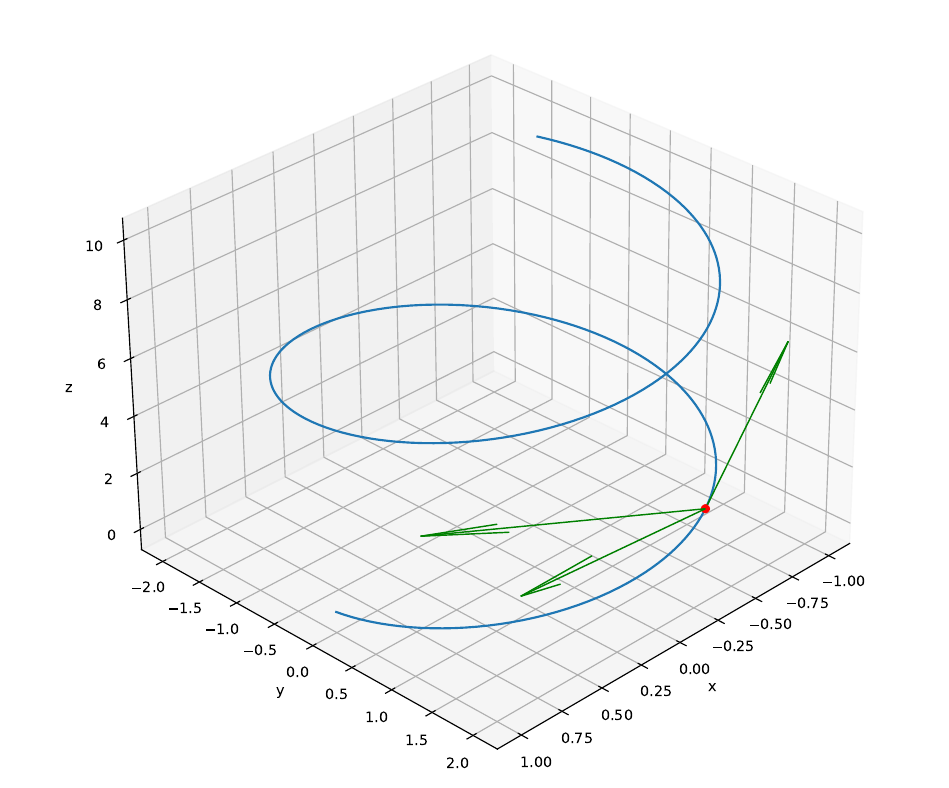